In [1]:
#implement the analysis of handwritten images using autoencoders

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(x_train,_),(x_test,_)=tf.keras.datasets.mnist.load_data()
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1642 - val_loss: 0.1133
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1042 - val_loss: 0.0967
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0965 - val_loss: 0.0940
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0951 - val_loss: 0.0934
Epoch 5/5
313/313 [==============================] - 0s 642us/step


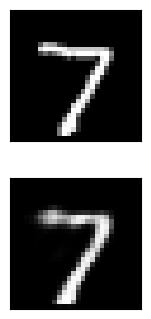

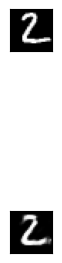

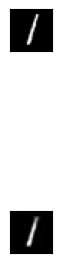

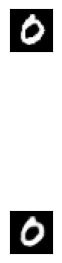

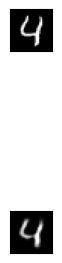

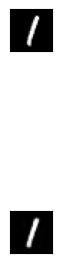

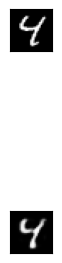

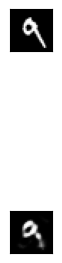

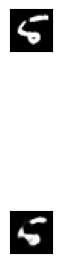

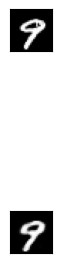

In [8]:
input_dim=x_train.shape[1]
encoding_dim=32
input_img=tf.keras.Input(shape=(input_dim,))
encoded=tf.keras.layers.Dense(encoding_dim,activation='relu')(input_img)
decoded=tf.keras.layers.Dense(input_dim,activation='sigmoid')(encoded)
autoencoder=tf.keras.Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=5,batch_size=32,shuffle=True,validation_data=(x_test,x_test))
reconstructed_images=autoencoder.predict(x_test)
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(reconstructed_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()